# ФИЛЬТР СПАМА (КЛАССИФИКАЦИЯ)

In [1]:
import pandas as pd
import numpy as np

Считайте датасет в Python (можете сразу грузить все в память, выборка небольшая), выясните, что используется в качестве разделителей и как проставляются метки классов.

In [73]:
fin = file('SMSSpamCollection.txt')
text_list = list()
class_list = list()
for line in fin:
    class_list.append(line.split()[0])
    text_list.append(line[4:])

In [74]:
print np.array(text_list).shape
print np.array(class_list).shape

(5574L,)
(5574L,)


In [75]:
print np.array(text_list)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'
 'Ok lar... Joking wif u oni...\n'
 "\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"
 ... 'Pity, * was in mood for that. So...any other suggestions?\n'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free\n"
 'Rofl. Its true to its name\n']


Подготовьте для дальнейшей работы два списка: список текстов в порядке их следования в датасете и список соответствующих им меток классов. В качестве метки класса используйте 1 для спама и 0 для "не спама".

In [76]:
def myfunc(s):
    if s == 'spam':
        s=1
    else:
        s=0
    return s
class_list = map(myfunc, class_list)

Используя sklearn.feature_extraction.text.CountVectorizer со стандартными настройками, получите из списка текстов матрицу признаков X.

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
text_list_transform = v.fit_transform(text_list)
print text_list_transform.shape

(5574, 8713)


Оцените качество классификации текстов с помощью LogisticRegression() с параметрами по умолчанию, используя sklearn.cross_validation. cross_val_score и посчитав среднее арифметическое качества на отдельных fold'ах. Установите random_state=2. Параметр cv задайте равным 10. В качестве метрики качества используйте f1-меру. Получившееся качество - один из ответов, которые потребуются при сдаче задания. Ответ округлить до 1 знака после запятой.

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #penalty - вид регуляризации, class_weight - балансировка классов

In [80]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=model, X=text_list_transform, y=class_list, cv=10, scoring='f1')
print score.mean() #средняя оценка
print score.std()  #разброс по оценкам

0.9333485268579415
0.020602401742324153


А теперь обучите классификатор на всей выборке и спрогнозируйте с его помощью класс для следующих сообщений:

"FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! Subscribe6GB"

"FreeMsg: Txt: claim your reward of 3 hours talk time"

"Have you visited the last lecture on physics?"

"Have you visited the last lecture on physics? Just buy this book and you will have all materials! Only 99$"

"Only 99$"

Прогнозы классификатора (0 - не спам, 1 - спам), записанные через пробел, будут ответом в одном из вопросов ниже.

In [81]:
model.fit(X=text_list_transform, y=class_list)
example = list([
    "FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! Subscribe6GB",
    "FreeMsg: Txt: claim your reward of 3 hours talk time",
    "Have you visited the last lecture on physics?",
    "Have you visited the last lecture on physics? Just buy this book and you will have all materials! Only 99$",
    "Only 99$"])
example_transform = v.transform(example)
example_pred = model.predict(example_transform)
print example_pred

[1 1 0 0 0]


Задайте в CountVectorizer параметр ngram_range=(2,2), затем ngram_range=(3,3), затем ngram_range=(1,3). Во всех трех случаях измерьте получившееся в кросс-валидации значение f1-меры, округлите до второго знака после точки, и выпишете результаты через пробел в том же порядке. В данном эксперименте мы пробовали добавлять в признаки n-граммы для разных диапазонов n - только биграммы, только триграммы, и, наконец, все вместе - униграммы, биграммы и триграммы. Обратите внимание, что статистики по биграммам и триграммам намного меньше, поэтому классификатор только на них работает хуже. В то же время это не ухудшает результат сколько-нибудь существенно, если добавлять их вместе с униграммами, т.к. за счет регуляризации линейный классификатор не склонен сильно переобучаться на этих признаках.

In [84]:
# В данном эксперименте мы пробовали добавлять в признаки n-граммы для разных диапазонов n - только биграммы, 
# только триграммы, и, наконец, все вместе - униграммы, биграммы и триграммы.
ngram_range = list([(2,2),(3,3),(1,3)]) 
for ngr in ngram_range:
    v = CountVectorizer(ngram_range=ngr)
    text_list_transform_gr = v.fit_transform(text_list)
    print text_list_transform_gr.shape
    model_gr = LogisticRegression()
    score = cross_val_score(estimator=model_gr, X=text_list_transform_gr, y=class_list, cv=10, scoring='f1')
    print score.mean(), '+\-', score.std() #средняя оценка

(5574, 41789)
0.8224220664187133 +\- 0.02564774372628094
(5574, 54455)
0.7250161555467377 +\- 0.01729741103338059
(5574, 104957)
0.9251382558648837 +\- 0.017605971996274155


Повторите аналогичный п.7 эксперимент, используя вместо логистической регрессии MultinomialNB(). Обратите внимание, насколько сильнее (по сравнению с линейным классификатором) наивный Байес страдает от нехватки статистики по биграммам и триграммам.

In [86]:
from sklearn.naive_bayes import MultinomialNB
for ngr in ngram_range:
    v = CountVectorizer(ngram_range=ngr)
    text_list_transform_gr = v.fit_transform(text_list)
    print text_list_transform_gr.shape
    model_gr = MultinomialNB()
    score = cross_val_score(estimator=model_gr, X=text_list_transform_gr, y=class_list, cv=10, scoring='f1')
    print score.mean(), '+\-', score.std() #средняя оценка

(5574, 41789)
0.6454554013558982 +\- 0.020171140659607602
(5574, 54455)
0.37862343087618666 +\- 0.009467430895415836
(5574, 104957)
0.8879054608894993 +\- 0.022223989442362396


Попробуйте использовать в логистической регрессии в качестве признаков Tf*idf из TfidfVectorizer на униграммах. Повысилось или понизилось качество на кросс-валидации по сравнению с CountVectorizer на униграммах? (напишите в файле с ответом 1, если повысилось, -1, если понизилось, и 0, если изменилось не более чем на 0.01). Обратите внимание, что результат перехода к tf*idf не всегда будет таким - если вы наблюдаете какое-то явление на одном датасете, не надо сразу же его обобщать на любые данные.

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
TF_IDF = TfidfVectorizer(ngram_range=(1,1))
text_list_transform = TF_IDF.fit_transform(text_list) # text_list - тексты
print text_list_transform.shape
model = LogisticRegression()
score = cross_val_score(estimator=model, X=text_list_transform, y=class_list, cv=10, scoring='f1')
print score.mean(), '+\-', score.std() 

(5574, 8713)
0.8528599554172456 +\- 0.023836421522097122


In [90]:
def get_most_important_features(vectorizer, model, n=5): #дает топ самых важных для построения модели слов
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

model.fit(text_list_transform, class_list)
importance = get_most_important_features(TF_IDF, model, 10)

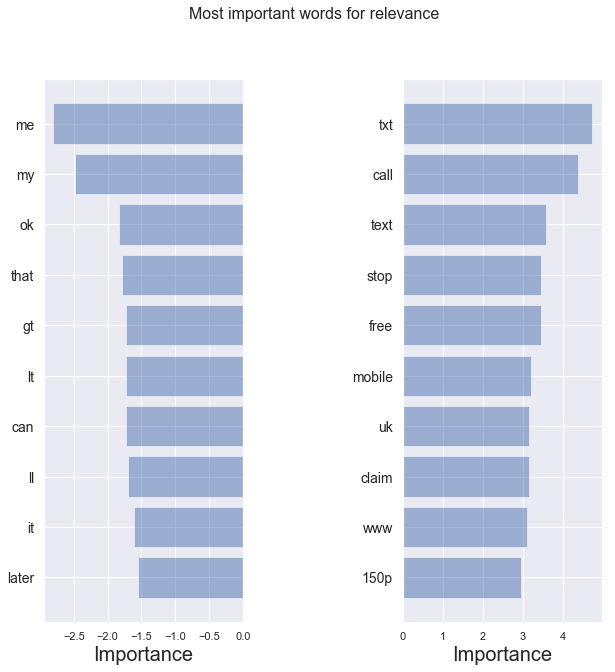

In [98]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name): #график топа самых важных слов 
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")